<a href="https://colab.research.google.com/github/rightbin/Deep-learning/blob/main/Spam_Classifier_using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 나이브 베이즈를 이용한 스팸 분류



# PROBLEM STATEMENT

- 5,574개의 이메일 메시지가 있으며, 스팸인지 아닌지의 정보를 가지고 있다.
- 컬럼 : text, spam
- spam 컬럼의 값이 1이면 스팸이고, 0이면 스팸이 아닙니다.
- 스팸인지 아닌지 분류하는 인공지능을 만들자 - 수퍼바이즈드 러닝의 분류 문제!


# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STEP #1: IMPORT DATASET

emails.csv 읽기

In [ ]:
spam_df =  pd.read_csv('emails.csv')

In [ ]:
import os 

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/day11')

In [ ]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [ ]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
spam_df.isna().sum()

text    0
spam    0
dtype: int64

# STEP #2: VISUALIZE DATASET

## 스팸과, 스팸이 아닌 것은 몇 개인지 확인해본다.

In [ ]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

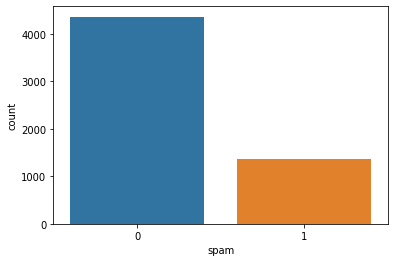

In [ ]:
sns.countplot(data=spam_df,x='spam')
plt.show()

 이메일의 길이가 스팸과 관련이 있는지 확인해보려 한다. 이메일의 문자 길이를 구해서, length 라는 컬럼을 만들어본다. 
 
 이때는 apply함수를 사용한다. 

In [ ]:
spam_df['length'] = spam_df['text'].apply(len)



In [ ]:
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


Histogram of length


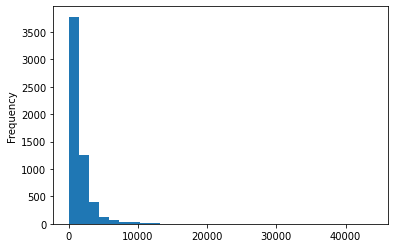

In [ ]:
spam_df['length'].plot(kind='hist',bins=30)
plt.show()

## 가장 긴 이메일을 찾아서 스팸인지 아닌지 확인하고, 이메일 내용을 확인해본다.

In [ ]:
spam_df.loc[ spam_df['length'] == spam_df.length.max() ,]

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [ ]:
spam_df.loc[ spam_df['length'] == spam_df.length.max() , 'text' ].values[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

파이차트를 통해, 스팸과 스팸이 아닌것이 몇 퍼센트인지, 소수점 1자리로 나타내 준다.


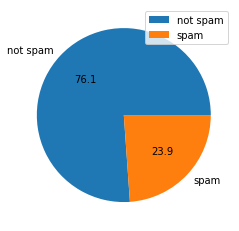

In [ ]:
plt.pie(spam_df['spam'].value_counts(), autopct='%.1f' , labels=['not spam','spam']  )
plt.legend()
plt.show()

스팸이 아닌것은 ham 변수로, 스팸인것은 spam 변수로 저장한다.

In [ ]:
ham = spam_df.loc[spam_df['spam'] == 0,]

In [ ]:
spam = spam_df.loc[spam_df['spam'] == 1,]

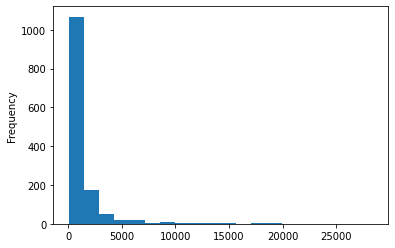

In [ ]:
# 스팸의 이메일 길이를 히스토그램으로 나타내시오.
spam['length'].plot(kind='hist',bins=20)
plt.show()

In [ ]:
# 햄의 이메일 길이를 히스토그램으로 나타내시오.

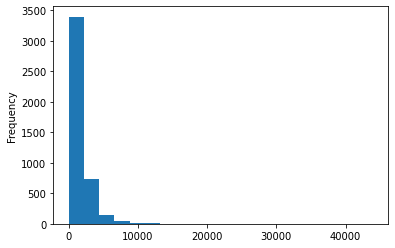

In [ ]:
ham['length'].plot(kind='hist',bins=20)
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 쉼표, 마침표 등의 구두점 제거하기

In [ ]:
import string 

In [ ]:
string.punctuation #구두점으로 사용하는 것을 다 모아둠 이미


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
test = 'Hello Mr.Future. I am so happy to be learnning AI now!!~~~~'

In [ ]:
Test_punc_removed = []
for char in test:
  if char not in string.punctuation:
    Test_punc_removed.append(char)


### 위의 문장에서, 글자를 앞에서부터 하나씩 가져와서, 구두점인지 확인한 후, 구두점이 아닌 문자를 가져오기

In [ ]:
# 결과 예시)   [ 'H', 'e', 'l', ...  'M', 'r', ' ','F' ... ]

In [ ]:
Test_punc_removed = [ char for char in test if char not in string.punctuation ] #위 코드와 동일

In [ ]:
print(Test_punc_removed)

['H', 'e', 'l', 'l', 'o', ' ', 'M', 'r', 'F', 'u', 't', 'u', 'r', 'e', ' ', 'I', ' ', 'a', 'm', ' ', 's', 'o', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'l', 'e', 'a', 'r', 'n', 'n', 'i', 'n', 'g', ' ', 'A', 'I', ' ', 'n', 'o', 'w']


### 위의 리스트에 있는 문자들을, 하나의 문자열로 만들기


In [ ]:
Test_punc_removed_join =''.join(Test_punc_removed)


In [ ]:
print(Test_punc_removed_join)

Hello MrFuture I am so happy to be learnning AI now


In [ ]:
test

'Hello Mr.Future. I am so happy to be learnning AI now!!~~~~'

# STEP 3.2 STOPWORDS(불용어) 제거하기
### Stopwords (불용어) 란? - https://bit.ly/34Ipha2

In [ ]:
import nltk 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_list = stopwords.words('english')

In [ ]:
Test_punc_removed_join.split()

['Hello',
 'MrFuture',
 'I',
 'am',
 'so',
 'happy',
 'to',
 'be',
 'learnning',
 'AI',
 'now']

### 구두점 제거한 문자열을, 이제 불용어 단어에 해당하지 않는 단어들만 모아서 리스트로 만드시오.
### 결과 예시) ['Hello', 'Mr', 'Future' ... ]

In [ ]:
Test_punc_removed_join_clean = []
for word in Test_punc_removed_join.split():
  if word not in stop_list:
    Test_punc_removed_join_clean.append(word)

In [ ]:
print(Test_punc_removed_join_clean)

['Hello', 'MrFuture', 'I', 'happy', 'learnning', 'AI']


In [ ]:
Test_punc_removed_join_clean = [  word for word in Test_punc_removed_join.split()  if word not in stop_list   ]

In [ ]:
print(Test_punc_removed_join_clean)

['Hello', 'MrFuture', 'I', 'happy', 'learnning', 'AI']


# STEP 3.3 COUNT VECTORIZER 

In [ ]:
#문자를 숫자로 바꾸어준다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data=['This is the first document.','I loved then',
             'This document is the second document',
             'I am loving you','And this is the third one.']

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names()) #사용한 모든 단어들이 나온다. 그래서 숫자로 바꾸어 준다.

['am', 'and', 'document', 'first', 'is', 'loved', 'loving', 'one', 'second', 'the', 'then', 'third', 'this', 'you']


In [ ]:
len(vectorizer.get_feature_names())

14

In [ ]:
X.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]])

# 이제, 우리의 데이터프레임에 있는, 이메일 내용을 Cleaning 한다.

In [ ]:
#1.구둣점을 제거, 불용어를 제거,카운터벡터화 한다.이런 세가지과정을 묶어서 파이프라인이라고 한다. 

#1. 구둣점 제거
#2. 불용어 제거 

In [ ]:
def message_cleaning(message):
  Test_punc_removed =[char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean


In [ ]:
message_cleaning("Hello~ my name is JB !! nice to meet you!!~~~@@.")

['Hello', 'name', 'JB', 'nice', 'meet']

In [ ]:
print(message_cleaning(spam_df['text'][0]))

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [ ]:
spam_df['text'].apply(message_cleaning)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

# 이메일의 내용을 벡터라이징 한다.

In [ ]:
vectorizer = CountVectorizer(analyzer= message_cleaning )

In [ ]:
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [ ]:
print(vectorizer.get_feature_names())

['\x01', '\x02', '\x03', '\x05', '\x06', '\x07', '\x08', '\x0f', '\x10', '\x12', '\x14', '\x15', '\x19', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '

In [ ]:
len(vectorizer.get_feature_names())

37229

In [ ]:
spamham_countvectorizer.toarray().shape

(5728, 37229)

In [ ]:
print(spamham_countvectorizer)

  (0, 3638)	1
  (0, 23369)	1
  (0, 18841)	1
  (0, 10065)	1
  (0, 17696)	1
  (0, 21140)	1
  (0, 27986)	1
  (0, 16674)	1
  (0, 28110)	1
  (0, 9296)	3
  (0, 21654)	2
  (0, 15429)	1
  (0, 32602)	1
  (0, 18238)	1
  (0, 18886)	1
  (0, 16089)	2
  (0, 8054)	1
  (0, 20952)	3
  (0, 32319)	1
  (0, 31968)	1
  (0, 24838)	1
  (0, 36025)	2
  (0, 21431)	2
  (0, 33037)	1
  (0, 23040)	2
  :	:
  (5727, 24818)	2
  (5727, 21624)	1
  (5727, 5729)	9
  (5727, 30934)	1
  (5727, 2828)	3
  (5727, 13338)	1
  (5727, 13127)	1
  (5727, 17388)	1
  (5727, 14130)	1
  (5727, 20273)	1
  (5727, 31827)	1
  (5727, 13128)	1
  (5727, 20467)	1
  (5727, 35288)	1
  (5727, 8629)	1
  (5727, 30082)	1
  (5727, 13522)	5
  (5727, 36185)	1
  (5727, 959)	2
  (5727, 2797)	1
  (5727, 30287)	1
  (5727, 17590)	1
  (5727, 33923)	1
  (5727, 10373)	1
  (5727, 11386)	1


# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.naive_bayes import GaussianNB ##둘중에 성능이 좋은거 쓰면 된다.

In [ ]:
classifier = MultinomialNB()


In [ ]:
classifier.fit(spamham_countvectorizer , spam_df['spam'].values  )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Test



In [ ]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

In [ ]:
testing1= vectorizer.transform(testing_sample)

In [ ]:
testing1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
classifier.predict(testing1)

array([1, 0])

In [ ]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [ ]:
testing2 = vectorizer.transform(testing_sample)

In [ ]:
testing2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
classifier.predict(testing2)

array([0, 1])

# STEP#4: Training셋과 Test셋으로 나눠서, 학습한다. 테스트셋은 20%로 한다. 

In [ ]:
print(vectorizer)

CountVectorizer(analyzer=<function message_cleaning at 0x7efc20f5f0d0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(spamham_countvectorizer , spam_df['spam'].values , test_size = 0.2 , random_state = 1)

In [ ]:
classifier = MultinomialNB()

In [ ]:
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

# STEP#5: 테스트셋으로 평가한다. 분류의 문제이므로 컨퓨전 매트릭스 확인. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[872,   4],
       [  2, 268]])

In [ ]:
(872+268) / cm.sum()

0.9947643979057592

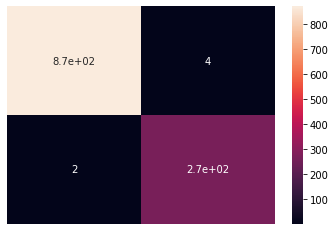

In [ ]:
sns.heatmap(cm,annot=True)
plt.axis('off')
plt.show()

# WordCloud Visualizing - 스팸 이메일에는 어떤 단어들이 많이 들어있는지 Visualizing

[WordCloud 활용 예](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/g7Y/image/QoUPiRwBMJoYAppVWNhMq4v8l-o)

In [ ]:
from wordcloud import WordCloud

In [ ]:
words_as_one_string = spam_df.loc[spam_df['spam'] == 1, 'text']

In [ ]:
words_as_one_string = words_as_one_string.to_list()

In [ ]:
words_as_one_string=' '.join(words_as_one_string)

In [ ]:
data  = WordCloud(background_color='white',stopwords=stop_words).generate(words_as_one_string)

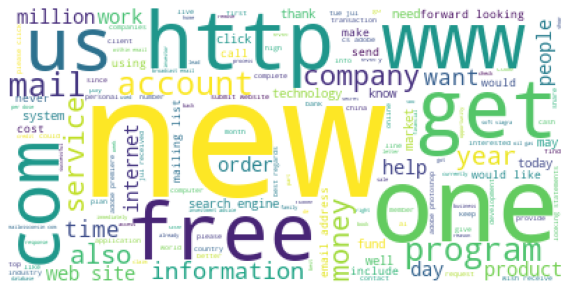

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data)
plt.axis('off')
plt.show()